In [11]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
import glob, os, json
import pandas as pd
from helper import *
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [12]:
proj_root="/pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5_w_simpolSOA"

N_GAS_SPEC = 84
N_AERO_SPEC = 5
N_ENV_PARAMS = 3

In [13]:
dev_str = 'CUDA/kokkoskernels-no_sacado'
dev_dir = os.path.join(proj_root, dev_str)
json_pattern = os.path.join(str(dev_dir),'wall_*.json')
gpu_list= glob.glob(json_pattern)

gpu = create_dataFrame_gpu(gpu_list)

Unable to read /pscratch/sd/s/samfred/TChem/TChem-atm/scripts/aerosol_performance/CB05CL_AE5_w_simpolSOA/CUDA/kokkoskernels-no_sacado/wall_times_nbatch_100_vecsize_4_teamThread_size_2_number_of_particles_100.json: Expected object or value


In [14]:
gpu

,walltime,iter_1,iter_2,iter_3,iter_4,nIter,nSamples,nBatch,vector_size,team_size,nParticles
Aerosol Chemistry_100t_2v_2b_1p,0.229360,0.202228,0.202206,0.202135,0.201874,5.0,100.0,100.0,2.0,2.0,1.0
Aerosol Chemistry_100t_2v_2b_10p,0.470641,0.425558,0.425580,0.425553,0.425558,5.0,100.0,100.0,2.0,2.0,10.0
Aerosol Chemistry_100t_2v_2b_100p,20.403297,19.433263,19.443348,19.434691,19.439599,5.0,100.0,100.0,2.0,2.0,100.0
Aerosol Chemistry_100t_4v_2b_1p,0.230853,0.202399,0.202923,0.201859,0.202384,5.0,100.0,100.0,2.0,4.0,1.0
Aerosol Chemistry_100t_4v_2b_10p,0.467628,0.425577,0.425599,0.424983,0.424950,5.0,100.0,100.0,2.0,4.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
Aerosol Chemistry_100t_256v_30b_10p,0.468509,0.425465,0.425464,0.425440,0.425470,5.0,100.0,100.0,30.0,256.0,10.0
Aerosol Chemistry_100t_512v_30b_1p,0.221709,0.202987,0.203001,0.203003,0.202996,5.0,100.0,100.0,30.0,512.0,1.0
Aerosol Chemistry_100t_512v_30b_10p,0.461862,0.425589,0.425586,0.425540,0.425565,5.0,100.0,100.0,30.0,512.0,10.0
Aerosol Chemistry_100t_1023v_30b_1p,0.228821,0.202997,0.202993,0.202995,0.202430,5.0,100.0,100.0,30.0,1023.0,1.0


In [15]:
vector_sizes = [2, 4, 8, 16, 30]
team_sizes = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1023]
n_particles = [1, 10, 100, 1000]
values = np.zeros((len(n_particles), len(vector_sizes), len(team_sizes)))

n_samples = 100
for pidx, particles in enumerate(n_particles):
    for i, vector in enumerate(vector_sizes):
        for j, team in enumerate(team_sizes):
            _data = gpu[(gpu.vector_size == vector) & (gpu.team_size == team) & (gpu.nParticles == particles) & (gpu.nSamples == n_samples)]
            if _data.empty:
                values[pidx, i,j] = np.nan
            else:
                val = _data.loc[:,'walltime'][0]
                values[pidx, i,j] = val

/tmp/ipykernel_401018/3099224886.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val = _data.loc[:,'walltime'][0]


/tmp/ipykernel_401018/2929256688.py:11: RuntimeWarning: All-NaN slice encountered
  time_min = np.nanmin(values[pidx, :, :])
/tmp/ipykernel_401018/2929256688.py:12: RuntimeWarning: All-NaN slice encountered
  time_max = np.nanmax(values[pidx, :, :])
/tmp/ipykernel_401018/2929256688.py:13: RuntimeWarning: Mean of empty slice
  time_mean = np.nanmean(values[pidx, :, :])


0.21873235200000002 0.23741922999999998 0.22686331816
0.45793097600000005 0.48549037700000003 0.47015489736
nan nan nan
nan nan nan


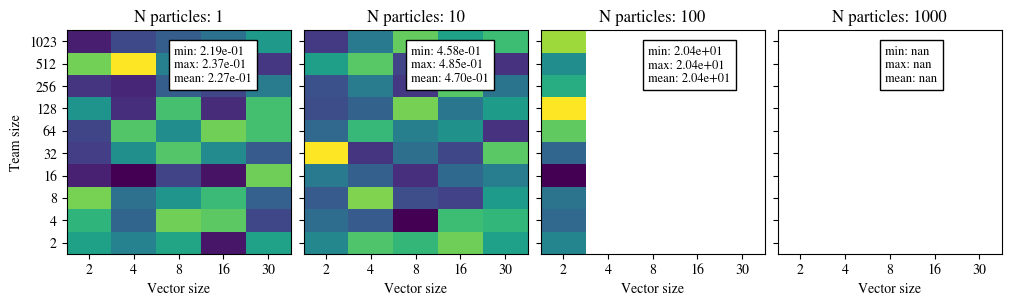

In [16]:
#norm = mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4)
fig, axs = plt.subplots(1,4, figsize=(10, 4), sharey=True, layout='constrained',subplot_kw=dict(box_aspect=1))

#norm = mpl.colors.Normalize(vmin=0.01, vmax=10)
for pidx, ax in enumerate(axs.flatten()):
    

    c = ax.pcolormesh(values[pidx, :, :].T, )#norm=norm)
    print(values[pidx, :, :].min(), values[pidx, :, :].max(), values[pidx, :, :].mean())

    time_min = np.nanmin(values[pidx, :, :])
    time_max = np.nanmax(values[pidx, :, :])
    time_mean = np.nanmean(values[pidx, :, :])
    ax.text(2.4, 7.7, f"min: {time_min:3.2e}\nmax: {time_max:3.2e}\nmean: {time_mean:3.2e}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))

    ax.set_xticks(np.arange(.5, len(vector_sizes), 1))
    ax.set_xticklabels(vector_sizes)
    ax.set_xlabel('Vector size')

    ax.set_yticks(np.arange(.5, len(team_sizes), 1))
    ax.set_yticklabels(team_sizes)
    if pidx == 0:
        ax.set_ylabel('Team size')

    ax.set_title(f'N particles: {n_particles[pidx]}')
    
#cbar = fig.colorbar(c, ax=axs, orientation='horizontal', fraction=0.15, pad=0.1)
#cbar.set_label('Wall time')

Text(0.5, 1.0, 'N particles: 1')

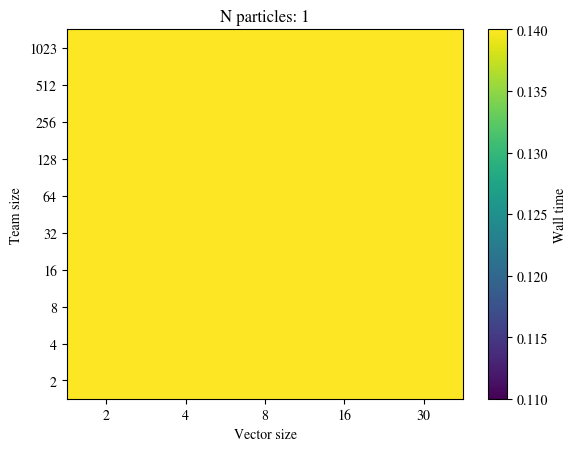

In [17]:
pidx = 0
#norm = mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4)
#norm = mpl.colors.Normalize(vmin=np.nanmin(values[pidx, :]), vmax=np.nanmax(values[pidx, :]))
norm = mpl.colors.Normalize(vmin=0.11, vmax=0.14)
fig, ax = plt.subplots(1,1)
c = ax.pcolormesh(values[pidx, :, :].T, norm=norm)

ax.set_xticks(np.arange(.5, len(vector_sizes), 1))
ax.set_xticklabels(vector_sizes)
ax.set_xlabel('Vector size')

ax.set_yticks(np.arange(.5, len(team_sizes), 1))
ax.set_yticklabels(team_sizes)
ax.set_ylabel('Team size')

cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Wall time')

ax.set_title(f'N particles: {n_particles[pidx]}')

Text(0.5, 1.0, 'N particles: 10')

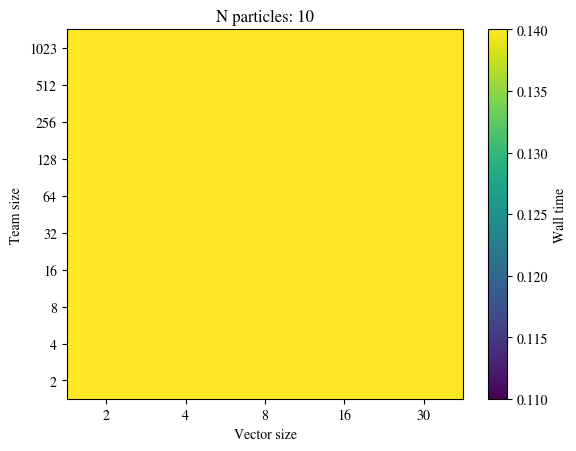

In [18]:
pidx = 1
#norm = mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4)
#norm = mpl.colors.Normalize(vmin=np.nanmin(values[pidx, :]), vmax=np.nanmax(values[pidx, :]))
norm = mpl.colors.Normalize(vmin=0.11, vmax=0.14)
fig, ax = plt.subplots(1,1)
c = ax.pcolormesh(values[pidx, :, :].T, norm=norm)

ax.set_xticks(np.arange(.5, len(vector_sizes), 1))
ax.set_xticklabels(vector_sizes)
ax.set_xlabel('Vector size')

ax.set_yticks(np.arange(.5, len(team_sizes), 1))
ax.set_yticklabels(team_sizes)
ax.set_ylabel('Team size')

cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Wall time')

ax.set_title(f'N particles: {n_particles[pidx]}')

Text(0.5, 1.0, 'N particles: 100')

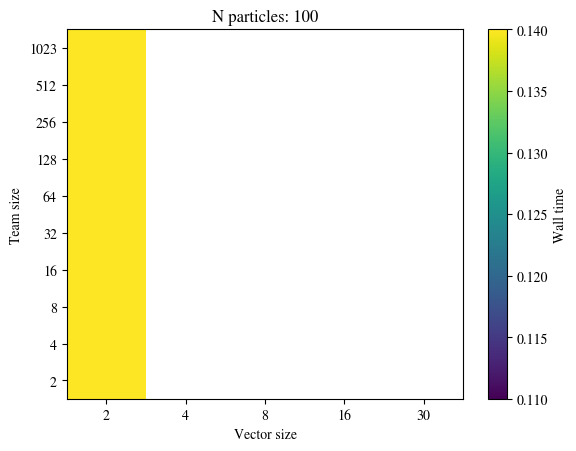

In [19]:
pidx = 2
#norm = mpl.colors.LogNorm(vmin=1e-7, vmax=1e-4)
#norm = mpl.colors.Normalize(vmin=np.nanmin(values[pidx, :]), vmax=np.nanmax(values[pidx, :]))
norm = mpl.colors.Normalize(vmin=0.11, vmax=0.14)
fig, ax = plt.subplots(1,1)
c = ax.pcolormesh(values[pidx, :, :].T, norm=norm)

ax.set_xticks(np.arange(.5, len(vector_sizes), 1))
ax.set_xticklabels(vector_sizes)
ax.set_xlabel('Vector size')

ax.set_yticks(np.arange(.5, len(team_sizes), 1))
ax.set_yticklabels(team_sizes)
ax.set_ylabel('Team size')

cbar = fig.colorbar(c, ax=ax)
cbar.set_label('Wall time')

ax.set_title(f'N particles: {n_particles[pidx]}')